In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
# converting train data to dataframe
boston_df=pd.DataFrame(X)
print(boston_df.head())
# for col in boston_df.columns: 
#     print(col) 

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [4]:
#Splitting whole data into train and test
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=5)

In [5]:
# applying column standardization on train and test data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [6]:
boston_df_train=pd.DataFrame(X_train)
boston_df_train['price']=y_train
boston_df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,0.875509,-0.499618,1.069608,-0.251124,1.645428,0.233772,0.969882,-0.900522,1.654486,1.538813,0.810913,-3.463820,1.611369,11.8
1,0.474665,-0.499618,1.069608,-0.251124,1.113435,-0.149715,0.383159,-0.926152,1.654486,1.538813,0.810913,-2.872888,1.265636,11.0
2,0.273444,-0.499618,1.069608,-0.251124,-0.168580,0.653301,0.270733,-0.241993,1.654486,1.538813,0.810913,0.389957,-0.671032,23.7
3,-0.417342,3.445319,-1.442682,-0.251124,-1.293614,1.372699,-1.591321,2.387078,-0.527917,-1.061095,-0.265106,0.421447,-1.082820,35.4
4,-0.400634,-0.499618,2.504352,-0.251124,0.502952,-1.215116,0.896102,-0.982361,-0.642780,1.804713,0.764129,0.412198,0.779361,15.2


In [7]:
print(boston_df_train.isnull().sum())

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
price    0
dtype: int64


In [8]:
print(boston_df_train.shape)

(354, 14)


In [162]:
# SGD implementation for linear regression

WEI,BIA,iteration,lr_rate,k=np.zeros(shape=(1,13)),0,1000,0.01,20 #intialise WEI and BIA to zero
for iteration in range(1000, 0, -1):
    wei,bia,temp_slope,temp_intercept=WEI,BIA,np.zeros(shape=(1,13)),0
# values=len(boston_df_train)
    data=boston_df_train.sample(20) #sampling random k=batch size=20 data(this is where SGD comes in to picture )
    x=np.array(data.drop('price',axis=1))
#     print("x",x)
    y=np.array(data['price'])
#     print("y",y)
    for i in range(k):
        temp_slope+=(-2)*x[i]*(y[i]-(np.dot(wei,x[i])+bia))#partial differentiation wrt w dl/dw=1/k(-2x)*(y-wTx-b)
        temp_intercept+=(-2)*(y[i]-(np.dot(wei,x[i])+bia))#partial differentiation wrt b dl/db=1/k(-2)*(y-wTx-b)
    WEI=(wei-lr_rate*(temp_slope )/k)
    BIA=(bia-lr_rate*(temp_intercept)/k)
    
print(WEI.shape)
print(BIA.shape)
print("temp_slope",temp_slope)
print("temp_intercept",temp_intercept)


(1, 13)
(1,)
temp_slope [[-18.89813255  25.53129981 -69.17482826  21.34351872 -71.51425142
  -38.7030151  -53.92207454  62.32059761 -31.3728457  -42.15630818
   42.60199391  -9.03777923   3.77643948]]
temp_intercept [-8.36262468]


In [160]:
#prediction on x_test
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.asscalar.html
# print(X_test.shape)
y_predic_deriv=[]
for i in range(len(X_test)):
#     https://www.pyimagesearch.com/2016/10/17/stochastic-gradient-descent-sgd-with-python/
    val=np.dot(WEI,X_test[i])+BIA  # It denotes dot product of transpose with respect to wei on test data for each iteration + bia
    y_predic_deriv.append(np.asscalar(val))
# print(y_predic_deriv)

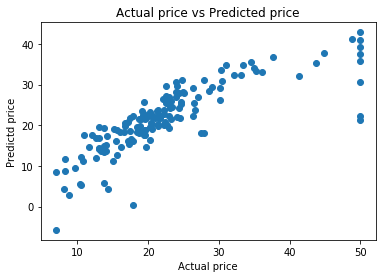

In [138]:
#Scatter plot of actual price vs predicted price
plt.scatter(y_test,y_predic_deriv)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

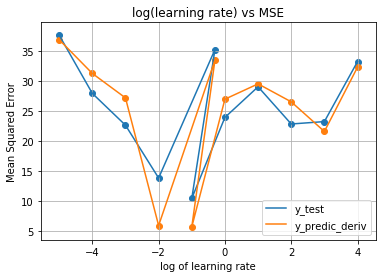

In [139]:
import math
r=[0.00001,0.0001,0.001,0.01,0.5,0.1,1,10,100,1000,10000]
x1=[math.log10(i) for i in r]
plt.plot(x1,y_test[0:11],label='y_test')
plt.plot(x1,y_predic_deriv[0:11],label='y_predic_deriv')
plt.scatter(x1,y_test[0:11])
plt.scatter(x1,y_predic_deriv[0:11])
plt.legend()
plt.xlabel('log of learning rate')
plt.ylabel('Mean Squared Error')
plt.title('log(learning rate) vs MSE')
plt.grid()
plt.show()

In [152]:
print(len(y_predic_deriv))
MSE_deriv=mean_squared_error(y_test,y_predic_deriv)
print('mean squared error =',MSE_deriv)

152
mean squared error = 31.4230956333


In [141]:
#SGD regression sklearn implementation
clf=SGDRegressor()
clf.fit(X_train,y_train)
y_pred_SGD=clf.predict(X_test)

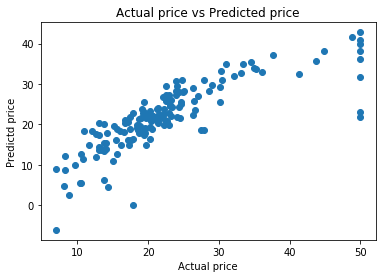

In [142]:
#Scatter plot of actual price vs predicted price
plt.scatter(y_test,y_pred_SGD)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

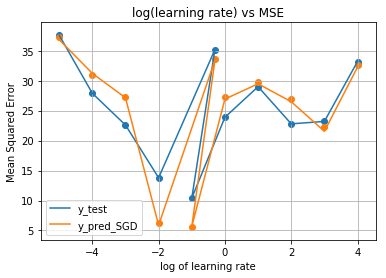

In [143]:
import math
r=[0.00001,0.0001,0.001,0.01,0.5,0.1,1,10,100,1000,10000]
x1=[math.log10(i) for i in r]
plt.plot(x1,y_test[0:11],label='y_test')
plt.plot(x1,y_predic_deriv[0:11],label='y_pred_SGD')
plt.scatter(x1,y_test[0:11])
plt.scatter(x1,y_pred_SGD[0:11])
plt.legend()
plt.xlabel('log of learning rate')
plt.ylabel('Mean Squared Error')
plt.title('log(learning rate) vs MSE')
plt.grid()
plt.show()

In [144]:
# From the above two scatter plots we can observe there is no much difference between SGD implementation and derivative implementation

In [145]:
MSE_SGD=mean_squared_error(y_test,y_pred_SGD)
print('mean squared error =',MSE_SGD)

mean squared error = 30.8546235948


In [146]:
for i in WEI:
    print(i)

[-1.15335114  0.88670674 -0.371608    0.18838795 -1.32543018  2.80710469
 -0.35917487 -2.50573676  1.94405901 -1.51637743 -2.06233996  0.97083587
 -3.22064668]


In [147]:
print(clf.coef_)

[-1.19349509  0.8109949  -0.45218493  0.22396757 -1.30365155  2.89162971
 -0.36774967 -2.63226921  1.8691396  -1.17508132 -2.04006442  1.13303377
 -3.26151334]


In [148]:
# derivative and SGD Comparision
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names=['Weight vector derivate','Weight vector SGD sklearn']
for i in range(13): # since there are 13 columns
    x.add_row([WEI[0][i],clf.coef_[i]])
print(x)

+------------------------+---------------------------+
| Weight vector derivate | Weight vector SGD sklearn |
+------------------------+---------------------------+
|     -1.15335114129     |       -1.19349509092      |
|     0.886706738696     |       0.810994902256      |
|    -0.371608001737     |      -0.452184934105      |
|     0.188387945504     |        0.2239675675       |
|     -1.32543018437     |       -1.30365155129      |
|     2.80710469237      |       2.89162971135       |
|    -0.359174871282     |      -0.367749669598      |
|     -2.50573676348     |       -2.63226920571      |
|     1.94405900682      |       1.86913959827       |
|     -1.51637743027     |       -1.17508132491      |
|     -2.06233996046     |       -2.04006442066      |
|     0.970835871589     |       1.13303377323       |
|     -3.22064667808     |       -3.26151333642      |
+------------------------+---------------------------+


In [149]:
# we applied SGD regressor in sklearn and compared weight ,mean squared error and scatter plot using derivative implementation.
# we observed that weights, scatter plots and mean squared error were nearly equal.